In [1]:
# Import necessary modules
import esppy.data.csv as csv
import esppy.preprocessing.filtering as filter
import esppy.analysis.power_spectrum as ps
import esppy.visualization.plot_power_spectrum as ps
import esppy.visualization.plot_time_series as ts
import esppy.visualization.plot_topomap as topomap
import esppy.utils.data as ud
import esppy.visualization.plot_eeg_signal as plot_eeg
import esppy.analysis.stats_analysis as stats

In [2]:
sampling_freq = 200 # Hz
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30

In [3]:
# Load sample data CSV file
data = csv.read_csv_eeg('data/eeg_data/sample_data.csv')
data.head()

the file path is
data/eeg_data/sample_data.csv


,sec,EEG,alpha,beta,delta,theta
0,2.440,-9.51538,-0.458429,-0.300244,-8.22506,0.938709
1,2.445,-8.83179,-0.477408,-0.096552,-7.79171,0.806110
2,2.450,-7.40356,-0.456316,0.177482,-7.35087,0.663650
3,2.455,-7.04956,-0.390345,0.317293,-6.90547,0.517710
4,2.460,-7.83081,-0.279366,0.224235,-6.45845,0.374589


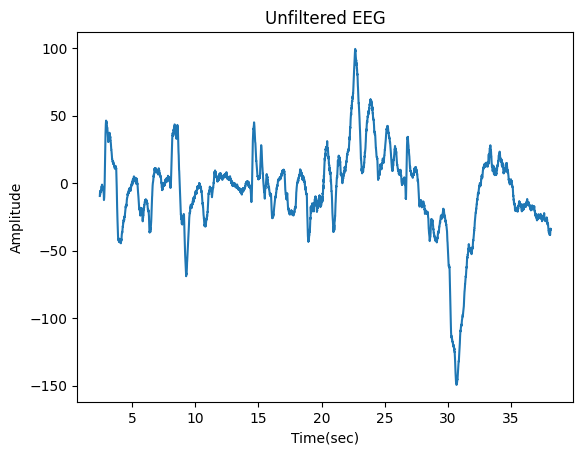

In [4]:
time = data['sec']
eeg = data['EEG']
plot_eeg.plot_eeg_signal(time, eeg, 'Unfiltered EEG','Time(sec)','Amplitude')

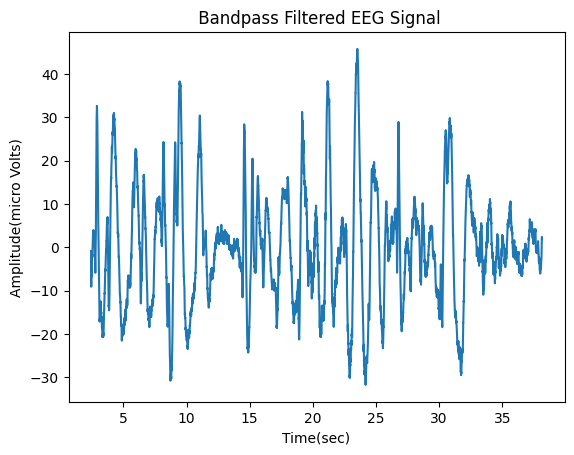

In [5]:
# Filter the data using bandpass filter
bandpass_filtered_eeg = filter.butter_bandpass_filter(data['EEG'], lowcut, highcut, sampling_freq, order) # 8-12 Hz bandpass filter
plot_eeg.plot_eeg_signal(time, bandpass_filtered_eeg, ' Bandpass Filtered EEG Signal','Time(sec)','Amplitude(micro Volts)')

In [6]:
#Filter using Notch filter
notch_filtered_data = filter.notch_filter(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq, 50, q)
notch_filtered_data=notch_filtered_data.ravel()

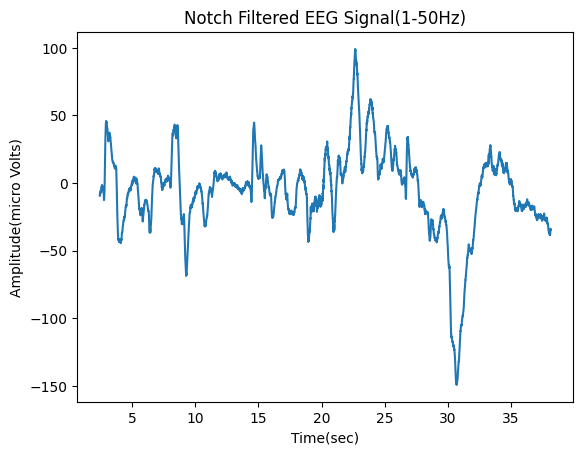

In [7]:
plot_eeg.plot_eeg_signal(time, notch_filtered_data, 'Notch Filtered EEG Signal(1-50Hz)','Time(sec)','Amplitude(micro Volts)')

In [8]:
# calculate relative power of alpha, beta, and theta bands
freqs, psd = stats.calculate_spectral_power(notch_filtered_data, sampling_freq)
delta_power, theta_power , alpha_power, beta_power= stats.calculate_relative_power(freqs, psd)

In [9]:
# print('Relative Power - Alpha: ', alpha_power)
# print('Relative Power - Beta: ', beta_power)
# print('Relative Power - Theta: ', theta_power)
# print('Relative Power - Delta: ', delta_power)

In [12]:
notch_filtered_data

array([ -9.27256923,  -8.60642289,  -7.68786764, ..., -34.08919772,
       -34.62875288, -34.63432755])

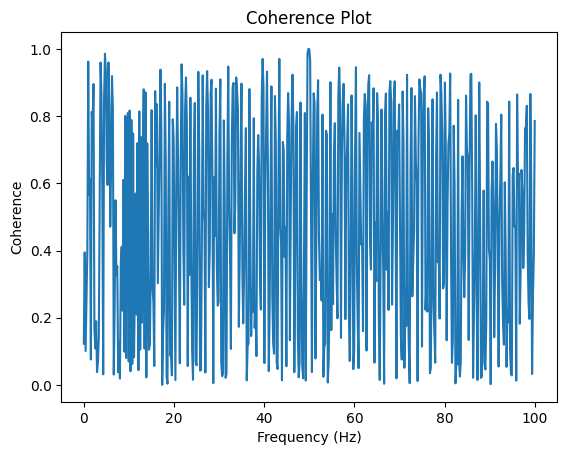

In [19]:
coherence, freqs =  stats.calculate_coherence(data['alpha'].to_numpy().T , data['theta'].to_numpy().T, sampling_freq )
# print('Coherence - Alpha/Theta: ', coherence)
plot_eeg.plot_eeg_signal(coherence, freqs, 'Coherence Plot','Frequency (Hz)','Coherence')

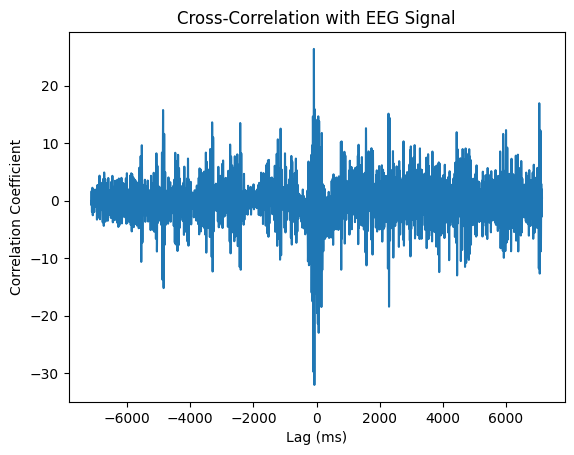

In [25]:
# calculate coherence between alpha and theta bands
lags, xcorr_alpha = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
_, xcorr_beta = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
import matplotlib.pyplot as plt
# plot the cross-correlation functions
# plt.plot(lags, xcorr_alpha, label='Alpha')
# plt.plot(lags, xcorr_beta, label='Beta')
plot_eeg.plot_eeg_signal(xcorr_alpha,lags, 'Cross-Correlation with EEG Signal','Lag (ms)','Correlation Coefficient')

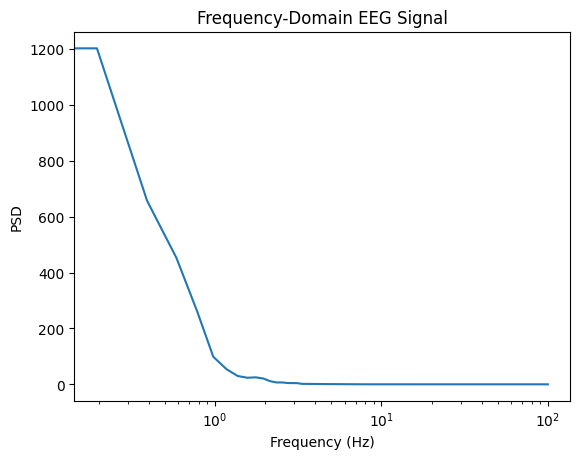

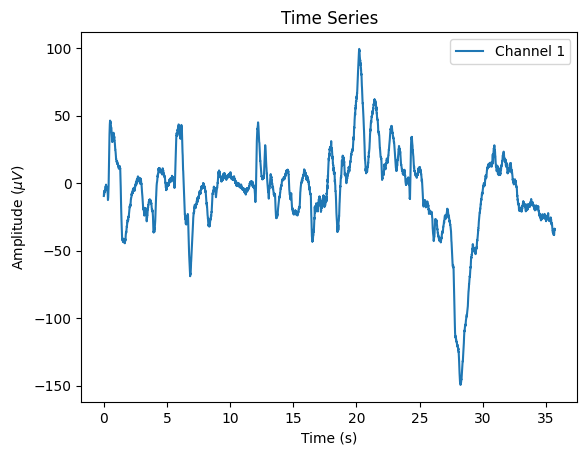

In [26]:
ps.welch_power_spectrum(data,200)
ts.plot_time_series(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq)
